# Capstone Project - Car accident severity (Week 1 & 2)

### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [1. Introduction: Business Problem](#introduction)
* [2. Data](#data)
* [3. Exploratory Data Analysis (Methodology – part 1) ](#exploratory)
* [4. Predictive Modeling (Methodology – part 2)](#modeling)
* [5. Results](#results)
* [6. Discussion](#discussion)
* [6. Conclusions](#conclusions)
* [References](#notes)

## 1. Introduction: Business Problem <a name="introduction"></a>

According to the WHO ([1](#notes)), even though vehicles have become much safer in the last decades, every year around 1.35 million people still die because of a road traffic crash and between 20 and 50 million more people suffer non-fatal injuries with many incurring a disability.

If we take a different perspective and consider the economic impact at national level, road traffic accidents also cost around 3% of gross domestic product to most countries ([2](#notes)).

Therefore, there is a great interest in different parts of society (such governments, decision-makers, car-makers, drivers, insurance companies) in changing and descreasing this trend.

A solution that would reduce the number of incidents could be the chance to warn a driver about the possibility of getting into a car accident and how severe that incident would be, given the weather and road conditions. In this way people would drive more carefully or even stay home.

Transforming this issue into a machine learning problem, we could use a dataset provided by a city and its police department (in our case Seattle City and the SPD - Seattle Police Department) to predict the probability and severity of an accident based on various factors, such as the conditions of weather and the road.

## 2. Data <a name="data"></a>

### 2.1 Data understanding

As already mentioned above, in this project we use the data provided by the SPD (Seattle Police Department) and recorded by the Traffic Records. This dataset - called Data-Collisions.csv - includes all types of collisions involving cars, bikes, pedestrians and others (around 200,000) from 2004 to present.

In this phase, after we extract the dataset we look for the most relevant attributes - related to the severity of an incident - out of the 38 available. Logically, the proper attributes are related to the the objective of our project, i.e. condition of the road, driver and weather.

Lastly, we search for trends, pattern and correlations.

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
#wget -O /Users/carlopeano/Desktop/projects/Coursera_Capstone/Data_Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv 

In [3]:
df = pd.read_csv('/Users/carlopeano/Desktop/projects/Coursera_Capstone/Data_Collisions.csv')
df.head()

/Users/carlopeano/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.shape

(194673, 38)

Thanks to the description of the attributes that is available together wtih the dataset ([3](#notes)), we have been able to define what - in our opinion - are the best independent variables and their dependent variable.

The scope of the project is to predict the likelihood and severity of an accident. Therefore, it becomes obvious that we use SEVERITYCODE (i.e. the severity of the accident) as the dependent variable. SEVERITYCODE is a categorical variable and follows a code that corresponds to the severity of the collision: 2 (injury) and 1 (property damage).

Out of the 37 attributes available in Seattle accident dataset, we start considering 8 of them as independent variables, thanks to their logical connection to the objective of our research study.

| VARIABLE | DESCRIPTION |
| :-:  | :-:  |
| PERSONCOUNT | The total number of people involved in the collision |
| VEHCOUNT | The number of vehicles involved in the collision. This is entered by the state|
| JUNCTIONTYPE |Category of junction at which collision took place |
| WEATHER | A description of the weather conditions during the time of the collision|
| ROADCOND | The condition of the road during the collision|
| LIGHTCOND | The light conditions during the collision|
| SPEEDING | Whether or not speeding was a factor in the collision|

JUNCTION, WEATHER, ROADCOND, and LIGHTCOND are the main attributes since they are directly connected to our objective that is the prediction of an accident based on the conditions of the weather and road.

PERSONCOUNT and VEHCOUNT makes us understand how big the accident can be. An accident can involve a lot of cars and people without necessarily and still have a low severity.

SPEEDING has a direct impact on the probability of the collision and is the only attribute that is actually a choise of the driver. 

### 2.2 Data Preparation

At this point, we drop the columns that are not interesting for us, deal with the missing data (look for them, decide what method apply, etc...), control the data format, balancing the labeled data, transform the categorical variables in binary variables if needed, clean the dataset and normalise the data so as to be ready for the next phase - i.e. modeling.

### 2.2.1 Unnecessary Columns

We drop the unnecessary columns.

In [5]:
df.drop(['LOCATION','X','Y','OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','SEVERITYCODE.1','SEVERITYDESC','COLLISIONTYPE','PEDCOUNT','PEDCYLCOUNT','ADDRTYPE', 'INTKEY','EXCEPTRSNCODE','EXCEPTRSNDESC','INCDATE','INCDTTM','SDOT_COLCODE','SDOT_COLDESC','INATTENTIONIND','UNDERINFL','PEDROWNOTGRNT','SDOTCOLNUM','ST_COLCODE','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','HITPARKEDCAR'], axis=1, inplace=True)
df.head(2)

,SEVERITYCODE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,2,2,At Intersection (intersection related),Overcast,Wet,Daylight,NaN
1,1,2,2,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,NaN


In [6]:
df.shape

(194673, 8)

In [7]:
df.describe(include = "all")

,SEVERITYCODE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
count,194673.000000,194673.000000,194673.000000,188344,189592,189661,189503,9333
unique,NaN,NaN,NaN,7,11,9,9,1
top,NaN,NaN,NaN,Mid-Block (not related to intersection),Clear,Dry,Daylight,Y
freq,NaN,NaN,NaN,89800,111135,124510,116137,9333
mean,1.298901,2.444427,1.920780,NaN,NaN,NaN,NaN,NaN
std,0.457778,1.345929,0.631047,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,1.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN
50%,1.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN
75%,2.000000,3.000000,2.000000,NaN,NaN,NaN,NaN,NaN


### 2.2.2 Evaluating for Missing Data

In [8]:
missing_data = df.isnull()
missing_data.head(5)

,SEVERITYCODE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True


"True" stands for missing value, while "False" stands for not missing value.

In [9]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64

SPEEDING
True     185340
False      9333
Name: SPEEDING, dtype: int64



Based on the summary above, eight columns contain missing data:
1. "SPEEDING" has 185340 missing data
2. "JUNCTIONTYPE" has 6329 missing data
3. "WEATHER" has 5081 missing data
4. "ROADCOND" has 5012 missing data
5. "LIGHTCOND" has 5170 missing data
6. "PERSONCOUNT" has 0 missing data
7. "VEHCOUNT" has 0 missing data

Furthermore:
1. "JUNCTIONTYPE" has 9 "Unknown"
2. "WEATHER" has 832 "Other" and 15091 "Unknown"
3. "ROADCOND" has 132 "Other" and 11012 "Unknown"
4. "LIGHTCOND" has 235 "Other" and 13473 "Unknown"
5. "PERSONCOUNT" has 5544 incidents involving 0 people
6. "VEHCOUNT" has 5085 accidents involving 0 vehicles


### 2.2.3 Dealing with missing data

Considering the attributes that could be interesting for us, we take the following actions:

#### "SPEEDING"

* Action:
    * Replace the missing data with "N" 
    * Replace "N" and "Y" with 0 and 1
* Reason: 
    * SPD recorded the data only when it was a factor of an accident ("Y"), otherwise they left it empty (SPD did never write "N"). Therefore, the missing data can be considered as those incidents when speeding was not a factor. This means that all the missing data can be actually filled with "N".

In [10]:
df['SPEEDING'].replace(np.nan, "N", inplace=True)
df['SPEEDING'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)

#### "JUNCTIONTYPE"
* Action:
    * simply delete the whole rows of missing data
    * Replace "Unknown" with the mode
* Reason:
    * Delete the missing data so as to avoid biasing the dataset
    * The mode already represents a high percentage of the data and replacing "Unknown" with the mode is the best solution
    
#### "WEATHER"
* Action:
    * simply delete the whole rows of "Other" and missing data
    * Replace "Unknown" with the mode
* Reason:  
    * Delete the missing data and "Other"  so as to avoid biasing the dataset
    * The mode already represents a high percentage of the data and replacing "Unknown" with the mode is the best solution

#### "ROADCOND"
* Action:
    * simply delete the whole rows of "Other" and missing data
    * Replace "Unknown" with the mode
* Reason:  
    * Delete the missing data and "Other"  so as to avoid biasing the dataset
    * The mode already represents a high percentage of the data and replacing "Unknown" with the mode is the best solution
    
#### "LIGHTCOND"
* Action:
    * simply delete the whole rows of "Other" and missing data
    * Replace "Unknown" with the mode
* Reason:
    * Delete the missing data and "Other"  so as to avoid biasing the dataset
    * The mode already represents a high percentage of the data and replacing "Unknown" with the mode is the best solution

In [11]:
# replace "Other" to NaN
df.replace("Other", np.nan, inplace = True)

In [12]:
# Eliminate nan in 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND','LIGHTCOND'
df.dropna(subset=['JUNCTIONTYPE', 'WEATHER', 'ROADCOND','LIGHTCOND'], axis=0, inplace=True)
df[['JUNCTIONTYPE', 'WEATHER', 'ROADCOND','LIGHTCOND']].isnull().sum(axis = 0)
df.shape

(182137, 8)

In [13]:
# Replace "Unknown" with the mode in 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND','LIGHTCOND' 
df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].replace(['Unknown'],df['JUNCTIONTYPE'].mode())
df['WEATHER'] = df['WEATHER'].replace(['Unknown'],df['WEATHER'].mode())
df['ROADCOND'] = df['ROADCOND'].replace(['Unknown'],df['ROADCOND'].mode())
df['LIGHTCOND'] = df['LIGHTCOND'].replace(['Unknown'],df['LIGHTCOND'].mode())

In [14]:
df.describe(include='object')

,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
count,182137,182137,182137,182137
unique,6,9,7,7
top,Mid-Block (not related to intersection),Clear,Dry,Daylight
freq,86138,120773,133174,123901


### 2.2.4 Dealing with Data and Project's Objective

As the project's objective is to predict the probability and severity of an accident based on various factors, such as the conditions of weather and the road, we are interested in incidents involving at least a person and a car.

Therefore, we need to drop those rows where people and cars involved are zero.

In [15]:
#Drop the accidents with zero people involved

# Get indexes where name column has value 0
indexNames = df[df['PERSONCOUNT'] == 0].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [16]:
#Drop the accidents with zero people involved

# Get indexes where name column has value 0
indexNames = df[df['VEHCOUNT'] == 0].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [17]:
df.shape

(176598, 8)

### 2.2.5 Correct data format

In [18]:
df.dtypes

SEVERITYCODE     int64
PERSONCOUNT      int64
VEHCOUNT         int64
JUNCTIONTYPE    object
WEATHER         object
ROADCOND        object
LIGHTCOND       object
SPEEDING         int64
dtype: object

All attributes have the right type.

### 2.2.6 One hot encoding technique

We use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame.

In [19]:
Feature = df[['JUNCTIONTYPE', 'WEATHER', 'ROADCOND','LIGHTCOND', 'PERSONCOUNT', 'VEHCOUNT']]
Feature = pd.concat([Feature,pd.get_dummies(df['JUNCTIONTYPE'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['WEATHER'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['ROADCOND'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['LIGHTCOND'])], axis=1)
Feature.drop(['JUNCTIONTYPE', 'WEATHER', 'ROADCOND','LIGHTCOND'], axis = 1,inplace=True)
Feature.head()

,PERSONCOUNT,VEHCOUNT,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Blowing Sand/Dirt,Clear,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,2,2,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,2,2,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,4,3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,3,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,2,2,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


### 2.2.7 Feature selection

We define feature set X and the labels y

In [20]:
X = Feature
X[0:5]

,PERSONCOUNT,VEHCOUNT,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Blowing Sand/Dirt,Clear,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,2,2,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,2,2,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,4,3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,3,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,2,2,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [21]:
X.describe()

,PERSONCOUNT,VEHCOUNT,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Blowing Sand/Dirt,Clear,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
count,176598.000000,176598.00000,176598.000000,176598.000000,176598.000000,176598.000000,176598.000000,176598.000000,176598.000000,176598.000000,...,176598.000000,176598.000000,176598.000000,176598.000000,176598.000000,176598.000000,176598.000000,176598.000000,176598.000000,176598.000000
mean,2.553947,1.97389,0.011008,0.334692,0.057843,0.123954,0.471613,0.000889,0.000272,0.660902,...,0.005413,0.000583,0.257862,0.007967,0.006393,0.262155,0.000051,0.013364,0.678366,0.031705
std,1.322591,0.55923,0.104340,0.471884,0.233447,0.329530,0.499195,0.029803,0.016484,0.473404,...,0.073377,0.024144,0.437459,0.088903,0.079701,0.439808,0.007139,0.114827,0.467105,0.175213
min,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,2.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,81.000000,12.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
y = df['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2])

Now we have a cleaned and balanced dataset and we can finally normalise the data.

### 2.2.8 Normalize Data

In [23]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.41883632,  0.0466896 , -0.10550156,  1.40990017, -0.24777912,
        -0.3761547 , -0.94475077, -0.02982978, -0.01648871, -1.3960664 ,
        -0.05502082,  2.37945644, -0.00532106, -0.46856946, -0.01189893,
        -0.02450702, -0.07015868, -1.64001704, -0.0807124 , -0.0181256 ,
        -0.01918862, -0.07377594, -0.02415752,  1.69647751, -0.08961716,
        -0.08021337, -0.59606853, -0.00713903, -0.11638166,  0.68857204,
        -0.18094994],
       [-0.41883632,  0.0466896 , -0.10550156, -0.70927007, -0.24777912,
        -0.3761547 ,  1.05848022, -0.02982978, -0.01648871, -1.3960664 ,
        -0.05502082, -0.42026405, -0.00532106,  2.13415532, -0.01189893,
        -0.02450702, -0.07015868, -1.64001704, -0.0807124 , -0.0181256 ,
        -0.01918862, -0.07377594, -0.02415752,  1.69647751, -0.08961716,
        -0.08021337,  1.67765944, -0.00713903, -0.11638166, -1.45228087,
        -0.18094994],
       [ 1.09335178,  1.83486802, -0.10550156, -0.70927007, -0.24777912,
       

Now we are finally ready for the next phase that is modeling.

## 3. Exploratory Data Analysis <a name="exploratory"></a>

In [24]:
df.describe(include=['object'])

,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
count,176598,176598,176598,176598
unique,6,9,7,7
top,Mid-Block (not related to intersection),Clear,Dry,Daylight
freq,83286,116714,128735,119798


### 3.1 Relation between speeding and accidents

In [25]:
speeding_counts = df["SPEEDING"].value_counts().to_frame()
speeding_counts.rename(columns={'SPEEDING': 'accidents'}, inplace=True)
speeding_counts.index.name = 'speeding'
speeding_counts

,accidents
speeding,
0,167476
1,9122


In [26]:
y_sp=speeding_counts["accidents"]
x_sp=y_sp.sum(axis=0)
speeding_counts['%_accidents'] = (y_sp / x_sp) * 100
speeding_counts['%_accidents'].to_frame()
sp_final=speeding_counts['%_accidents'].round(decimals=2)
sp_final.to_frame()

,%_accidents
speeding,
0,94.83
1,5.17


Examining the value counts, speeding would not be a good predictor variable for the probability and severity of the accident. This is because we only 5.17% of the accidents are caused by driving too fast, this result is skewed. Thus, we are not able to draw any conclusions about this attribute.

### 3.2 Relation between types of junction and accidents

In [27]:
junctiontype_counts = df["JUNCTIONTYPE"].value_counts().to_frame()
junctiontype_counts.rename(columns={'JUNCTIONTYPE': 'accidents'}, inplace=True)
junctiontype_counts.index.name = 'junction_type'
junctiontype_counts

,accidents
junction_type,
Mid-Block (not related to intersection),83286
At Intersection (intersection related),59106
Mid-Block (but intersection related),21890
Driveway Junction,10215
At Intersection (but not related to intersection),1944
Ramp Junction,157


Text(0.5, 1.0, 'Relation between street junction and accidents')

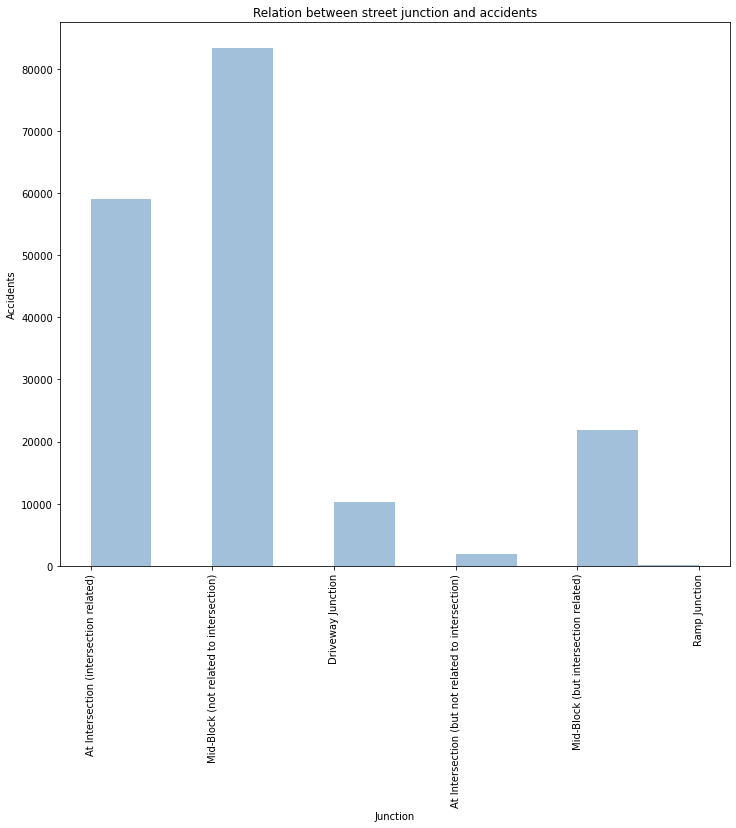

In [28]:
plt.figure(figsize=(12,10))

plt.hist(df["JUNCTIONTYPE"], alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none')

plt.xticks(rotation=90)
plt.xlabel("Junction") 
plt.ylabel("Accidents") 
plt.title("Relation between street junction and accidents")

In [29]:
y_jt=junctiontype_counts["accidents"]
x_jt=y_jt.sum(axis=0)
junctiontype_counts['%_accidents'] = (y_jt / x_jt) * 100
junctiontype_counts['%_accidents'].to_frame()
jt_final=junctiontype_counts['%_accidents'].round(decimals=2)
jt_final.to_frame()

,%_accidents
junction_type,
Mid-Block (not related to intersection),47.16
At Intersection (intersection related),33.47
Mid-Block (but intersection related),12.40
Driveway Junction,5.78
At Intersection (but not related to intersection),1.10
Ramp Junction,0.09


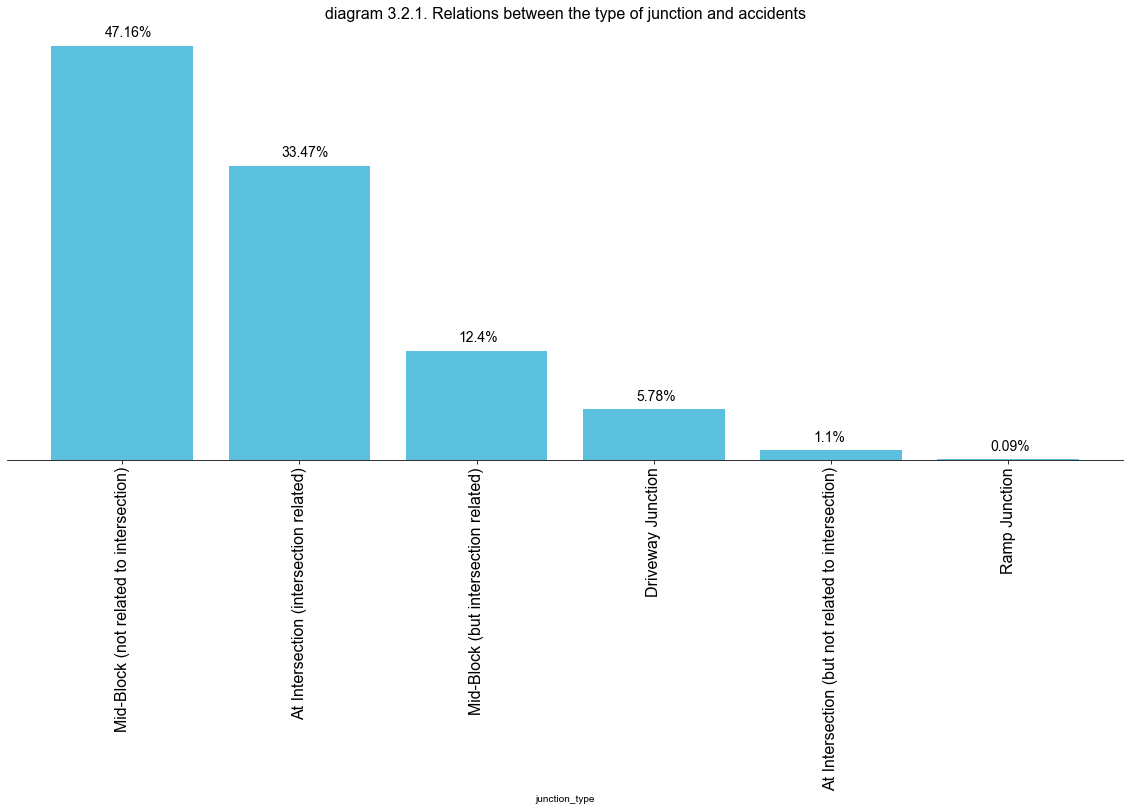

In [30]:
ax = jt_final.plot(kind='bar', figsize=(20, 8), color=('#5bc0de'),  width = 0.8, fontsize=16)


sns.set_style('ticks')

ax.set_title("diagram 3.2.1. Relations between the type of junction and accidents", fontsize=16)

ax.axes.get_yaxis().set_visible(False)
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.set_facecolor('xkcd:white')

    
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.3, i.get_height()+1, \
            str(round((i.get_height()), 2))+'%', fontsize=14, color='black')

In [31]:
df_group_one = df[['JUNCTIONTYPE','WEATHER','SEVERITYCODE']]


In [32]:
junction_sev = df.groupby(['JUNCTIONTYPE', 'SEVERITYCODE']).size().to_frame()
junction_sev.rename(columns={0: 'accidents'}, inplace=True)
junction_sev

accidents
JUNCTIONTYPE                                      SEVERITYCODE           
At Intersection (but not related to intersection) 1                  1365
                                                  2                   579
At Intersection (intersection related)            1                 33337
                                                  2                 25769
Driveway Junction                                 1                  7105
                                                  2                  3110
Mid-Block (but intersection related)              1                 14838
                                                  2                  7052
Mid-Block (not related to intersection)           1                 65293
                                                  2                 17993
Ramp Junction                                     1                   107
                                                  2                    50

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

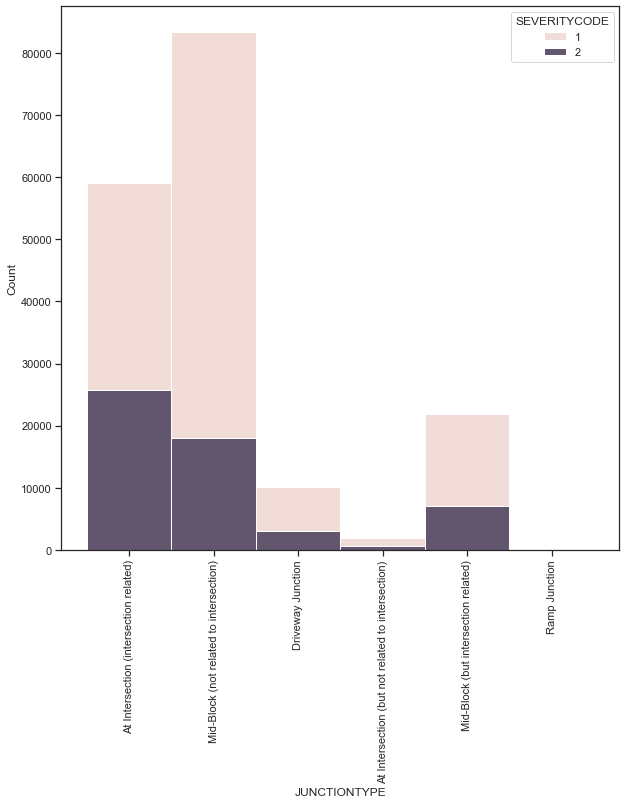

In [33]:
sns.set(style='ticks')
plt.figure(figsize=(10, 10))

sns.histplot(df, x="JUNCTIONTYPE", hue="SEVERITYCODE", multiple="stack")
plt.xticks(rotation=90)

### 3.3. Relation between weather and accidents

In [34]:
weather_counts = df["WEATHER"].value_counts().to_frame()
weather_counts.rename(columns={'WEATHER': 'accidents'}, inplace=True)
weather_counts.index.name = 'weather'
weather_counts

,accidents
weather,
Clear,116714
Raining,31793
Overcast,26509
Snowing,865
Fog/Smog/Smoke,533
Sleet/Hail/Freezing Rain,106
Blowing Sand/Dirt,48
Severe Crosswind,25
Partly Cloudy,5


In [35]:
y_w=weather_counts["accidents"]
x_w=y_w.sum(axis=0)
weather_counts['%_accidents'] = (y_w / x_w) * 100
weather_counts['%_accidents'].to_frame()
jw_final=weather_counts['%_accidents'].round(decimals=2)
jw_final.to_frame()

,%_accidents
weather,
Clear,66.09
Raining,18.00
Overcast,15.01
Snowing,0.49
Fog/Smog/Smoke,0.30
Sleet/Hail/Freezing Rain,0.06
Blowing Sand/Dirt,0.03
Severe Crosswind,0.01
Partly Cloudy,0.00


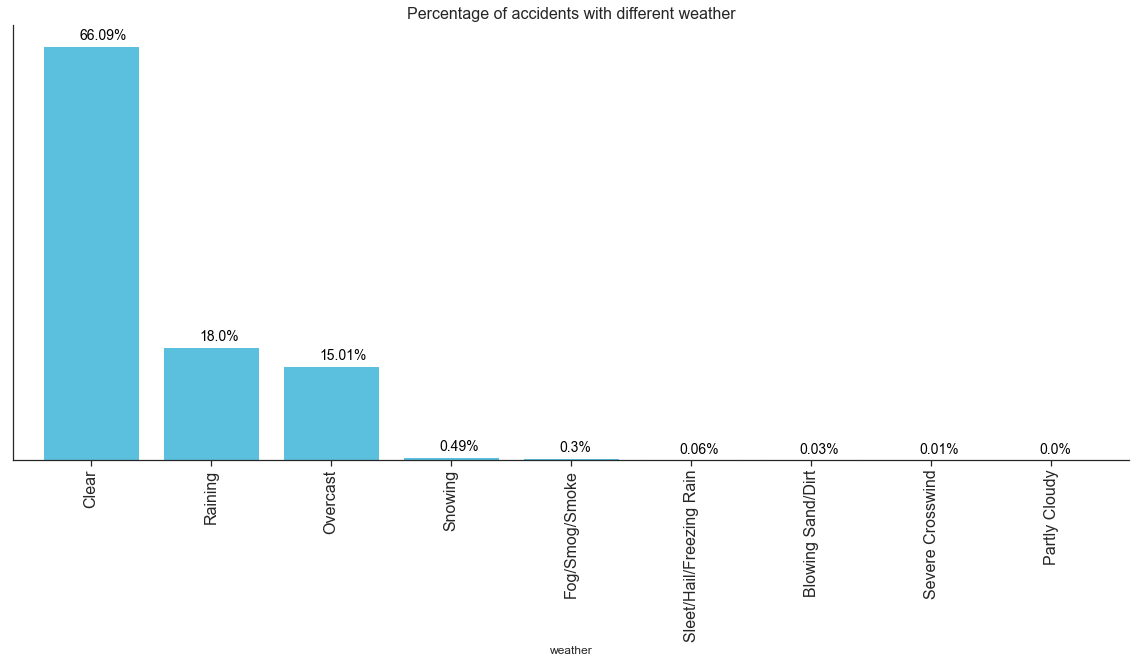

In [36]:
ax = jw_final.plot(kind='bar', figsize=(20, 8), color=('#5bc0de'),  width = 0.8, fontsize=16)


sns.set_style('ticks')

ax.set_title("Percentage of accidents with different weather", fontsize=16)

ax.axes.get_yaxis().set_visible(False)
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_facecolor('xkcd:white')

    
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.3, i.get_height()+1, \
            str(round((i.get_height()), 2))+'%', fontsize=14, color='black')

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

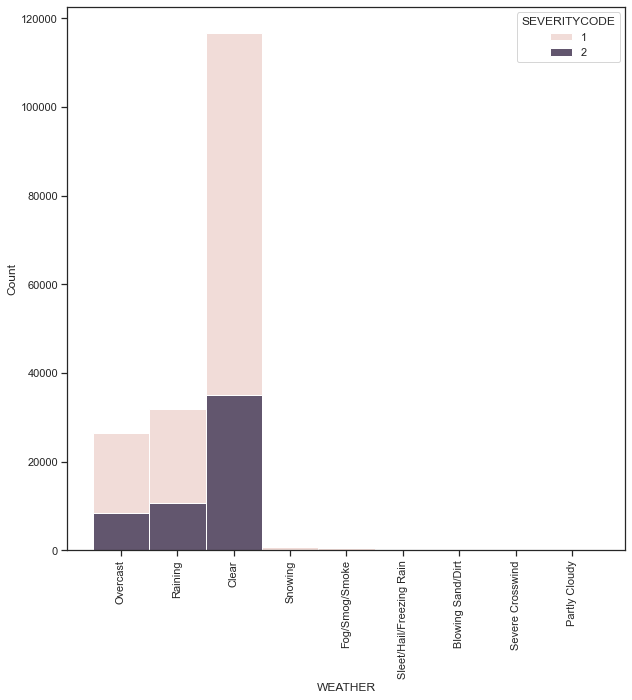

In [37]:
sns.set(style='ticks')
plt.figure(figsize=(10, 10))

sns.histplot(df, x="WEATHER", hue="SEVERITYCODE", multiple="stack")
plt.xticks(rotation=90)

In [38]:
df_group_one = df[['WEATHER','SEVERITYCODE']]


In [39]:
weather_sev = df.groupby(['WEATHER', 'SEVERITYCODE']).size().to_frame()
weather_sev.rename(columns={0: 'accidents'}, inplace=True)
weather_sev

accidents
WEATHER                  SEVERITYCODE           
Blowing Sand/Dirt        1                    36
                         2                    12
Clear                    1                 81758
                         2                 34956
Fog/Smog/Smoke           1                   357
                         2                   176
Overcast                 1                 18074
                         2                  8435
Partly Cloudy            1                     2
                         2                     3
Raining                  1                 21017
                         2                 10776
Severe Crosswind         1                    18
                         2                     7
Sleet/Hail/Freezing Rain 1                    79
                         2                    27
Snowing                  1                   704
                         2                   161

### 3.4. Relation between road condition and accidents

In [40]:
roadcond_counts = df["ROADCOND"].value_counts().to_frame()
roadcond_counts.rename(columns={'ROADCOND': 'accidents'}, inplace=True)
roadcond_counts.index.name = 'road_conditions'
roadcond_counts

,accidents
road_conditions,
Dry,128735
Wet,45538
Ice,1143
Snow/Slush,956
Standing Water,103
Sand/Mud/Dirt,65
Oil,58


Text(0.5, 1.0, 'Relation between road condition and accidents')

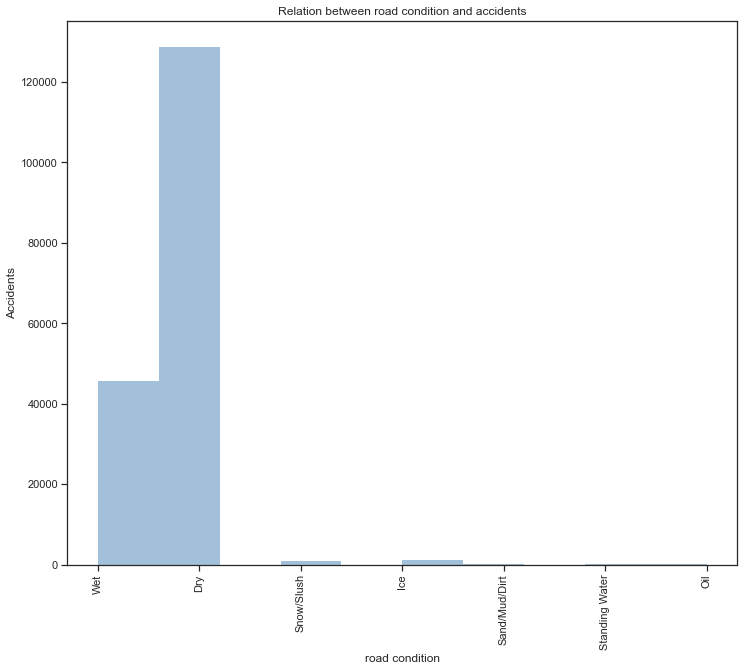

In [41]:
plt.figure(figsize=(12,10))

plt.hist(df["ROADCOND"], alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none')

plt.xticks(rotation=90)
plt.xlabel("road condition") 
plt.ylabel("Accidents") 
plt.title("Relation between road condition and accidents")

In [42]:
y_rd=roadcond_counts["accidents"]
x_rd=y_rd.sum(axis=0)
roadcond_counts['%_accidents'] = (y_rd / x_rd) * 100
roadcond_counts['%_accidents'].to_frame()
jrd_final=roadcond_counts['%_accidents'].round(decimals=2)
jrd_final.to_frame()

,%_accidents
road_conditions,
Dry,72.90
Wet,25.79
Ice,0.65
Snow/Slush,0.54
Standing Water,0.06
Sand/Mud/Dirt,0.04
Oil,0.03


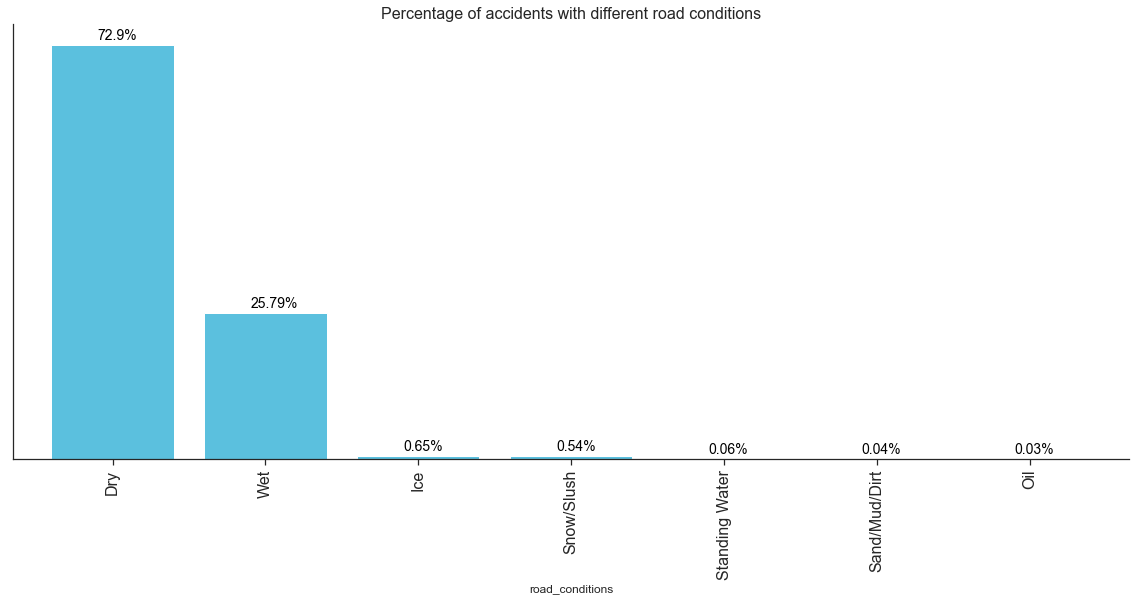

In [43]:
ax = jrd_final.plot(kind='bar', figsize=(20, 8), color=('#5bc0de'),  width = 0.8, fontsize=16)


sns.set_style('ticks')

ax.set_title("Percentage of accidents with different road conditions", fontsize=16)

ax.axes.get_yaxis().set_visible(False)
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_facecolor('xkcd:white')

    
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.3, i.get_height()+1, \
            str(round((i.get_height()), 2))+'%', fontsize=14, color='black')

In [44]:
df_group_one = df[['ROADCOND','SEVERITYCODE']]


In [45]:
roadcond_sev = df.groupby(['ROADCOND', 'SEVERITYCODE']).size().to_frame()
roadcond_sev.rename(columns={0: 'accidents'}, inplace=True)
roadcond_sev

accidents
ROADCOND       SEVERITYCODE           
Dry            1                 89879
               2                 38856
Ice            1                   888
               2                   255
Oil            1                    34
               2                    24
Sand/Mud/Dirt  1                    43
               2                    22
Snow/Slush     1                   795
               2                   161
Standing Water 1                    77
               2                    26
Wet            1                 30329
               2                 15209

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

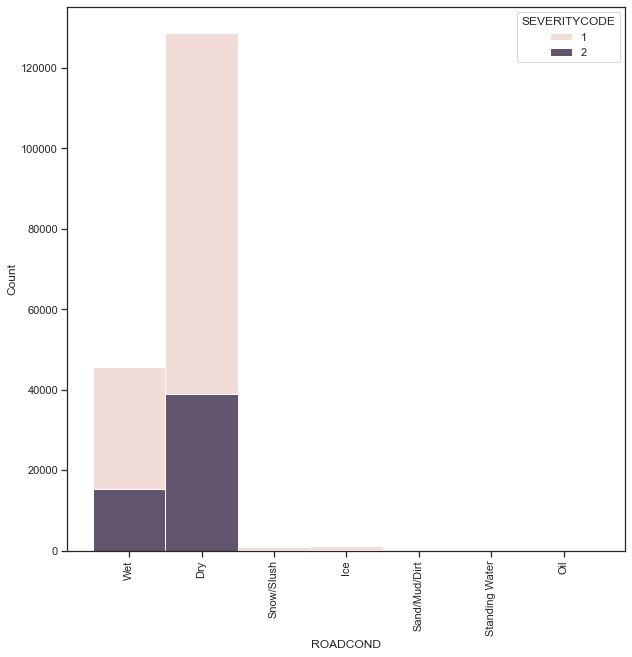

In [46]:
sns.set(style='ticks')
plt.figure(figsize=(10, 10))

sns.histplot(df, x="ROADCOND", hue="SEVERITYCODE", multiple="stack")
plt.xticks(rotation=90)

### 3.4. Relation between light condition and accidents

In [47]:
lightcond_counts = df["LIGHTCOND"].value_counts().to_frame()
lightcond_counts.rename(columns={'LIGHTCOND': 'accidents'}, inplace=True)
lightcond_counts.index.name = 'light_conditions'
lightcond_counts

,accidents
light_conditions,
Daylight,119798
Dark - Street Lights On,46296
Dusk,5599
Dawn,2360
Dark - No Street Lights,1407
Dark - Street Lights Off,1129
Dark - Unknown Lighting,9


Text(0.5, 1.0, 'Relation between light condition and accidents')

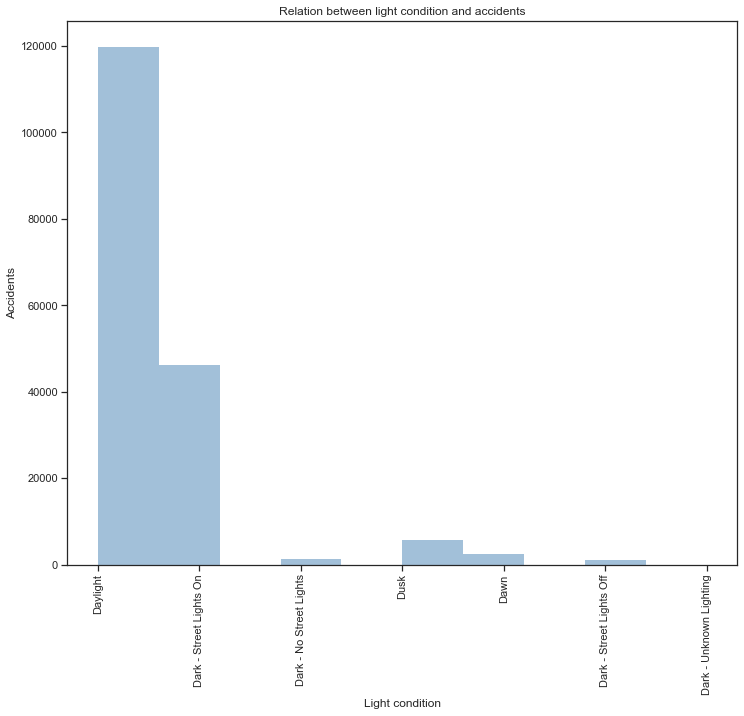

In [48]:
plt.figure(figsize=(12,10))

plt.hist(df["LIGHTCOND"], alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none')

plt.xticks(rotation=90)
plt.xlabel("Light condition") 
plt.ylabel("Accidents") 
plt.title("Relation between light condition and accidents")

In [49]:
y_ld=lightcond_counts["accidents"]
x_ld=y_rd.sum(axis=0)
lightcond_counts['%_accidents'] = (y_ld / x_ld) * 100
lightcond_counts['%_accidents'].to_frame()
jld_final=lightcond_counts['%_accidents'].round(decimals=2)
jld_final.to_frame()

,%_accidents
light_conditions,
Daylight,67.84
Dark - Street Lights On,26.22
Dusk,3.17
Dawn,1.34
Dark - No Street Lights,0.80
Dark - Street Lights Off,0.64
Dark - Unknown Lighting,0.01


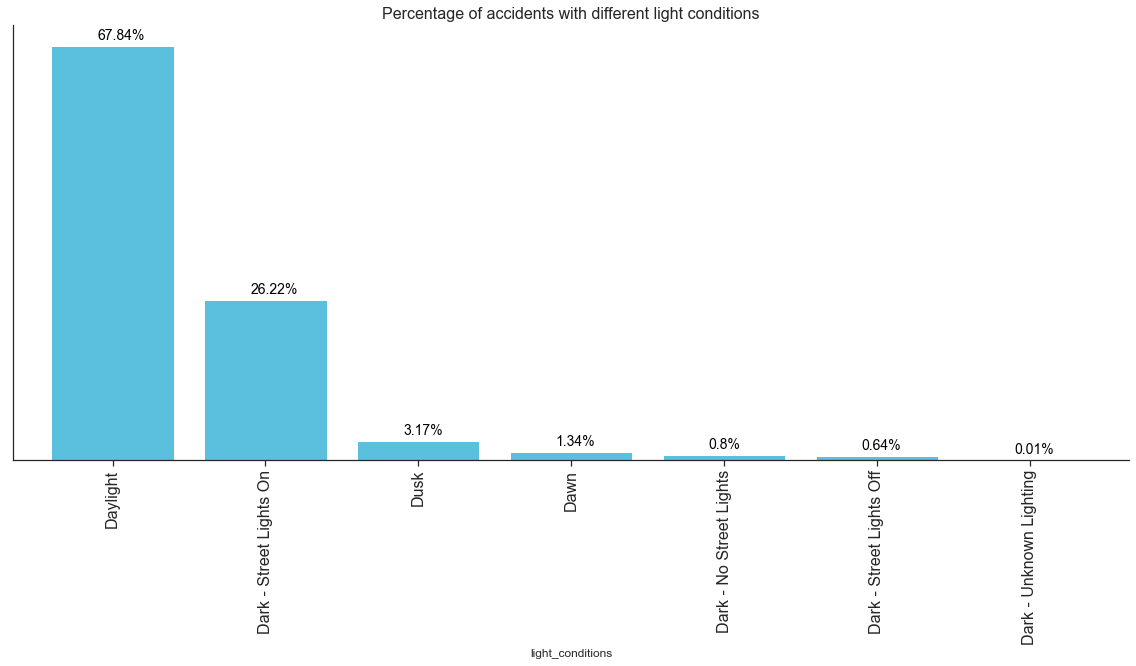

In [50]:
ax = jld_final.plot(kind='bar', figsize=(20, 8), color=('#5bc0de'),  width = 0.8, fontsize=16)


sns.set_style('ticks')

ax.set_title("Percentage of accidents with different light conditions", fontsize=16)

ax.axes.get_yaxis().set_visible(False)
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_facecolor('xkcd:white')

    
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.3, i.get_height()+1, \
            str(round((i.get_height()), 2))+'%', fontsize=14, color='black')

In [51]:
df_group_one = df[['LIGHTCOND','SEVERITYCODE']]


In [52]:
lightcond_sev = df.groupby(['LIGHTCOND', 'SEVERITYCODE']).size().to_frame()
lightcond_sev.rename(columns={0: 'accidents'}, inplace=True)
lightcond_sev

accidents
LIGHTCOND                SEVERITYCODE           
Dark - No Street Lights  1                  1096
                         2                   311
Dark - Street Lights Off 1                   821
                         2                   308
Dark - Street Lights On  1                 32346
                         2                 13950
Dark - Unknown Lighting  1                     6
                         2                     3
Dawn                     1                  1576
                         2                   784
Daylight                 1                 82461
                         2                 37337
Dusk                     1                  3739
                         2                  1860

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

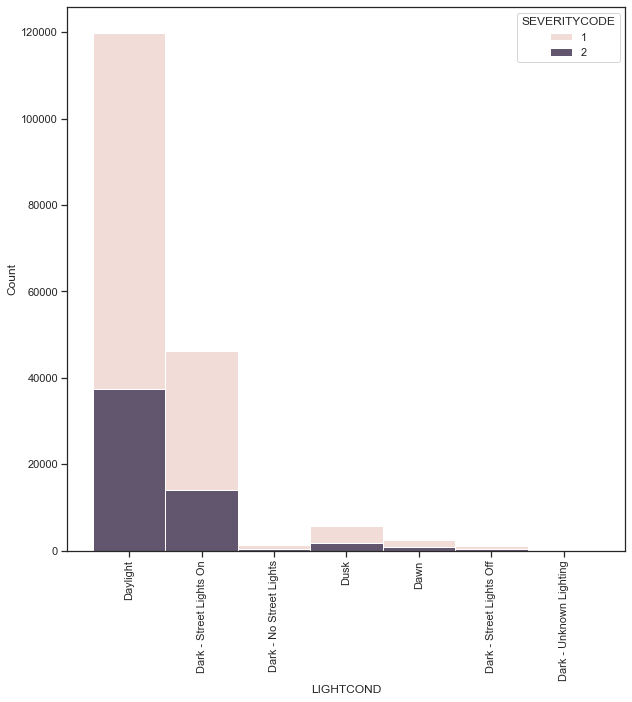

In [53]:
sns.set(style='ticks')
plt.figure(figsize=(10, 10))

sns.histplot(df, x="LIGHTCOND", hue="SEVERITYCODE", multiple="stack")
plt.xticks(rotation=90)

### 3.5. Relation between Number of people involved and accidents

In [54]:
df['PERSONCOUNT'].describe()

count    176598.000000
mean          2.553947
std           1.322591
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          81.000000
Name: PERSONCOUNT, dtype: float64

In [55]:
personcount_counts = df["PERSONCOUNT"].value_counts().to_frame()
personcount_counts.rename(columns={'PERSONCOUNT': 'accidents'}, inplace=True)
personcount_counts.index.name = 'People_involved'
personcount_counts

,accidents
People_involved,
2,105042
3,34740
4,14306
1,11068
5,6533
6,2684
7,1120
8,530
9,212


In [56]:
y_pc=personcount_counts["accidents"]
x_pc=y_rd.sum(axis=0)
personcount_counts['%_accidents'] = (y_pc / x_pc) * 100
personcount_counts['%_accidents'].to_frame()
jpc=personcount_counts['%_accidents'].round(decimals=2)
jpc_final=jpc.iloc[0:10]
jpc_final.to_frame()

,%_accidents
People_involved,
2,59.48
3,19.67
4,8.10
1,6.27
5,3.70
6,1.52
7,0.63
8,0.30
9,0.12


In [57]:
personcount_sev = df.groupby(['PERSONCOUNT', 'SEVERITYCODE']).size().to_frame()
pc_sevtop10=personcount_sev.iloc[0:20]
pc_sevtop10

0
PERSONCOUNT SEVERITYCODE       
1           1              8241
            2              2827
2           1             78226
            2             26816
3           1             21524
            2             13216
4           1              8137
            2              6169
5           1              3588
            2              2945
6           1              1335
            2              1349
7           1               486
            2               634
8           1               247
            2               283
9           1                85
            2               127
10          1                53
            2                74

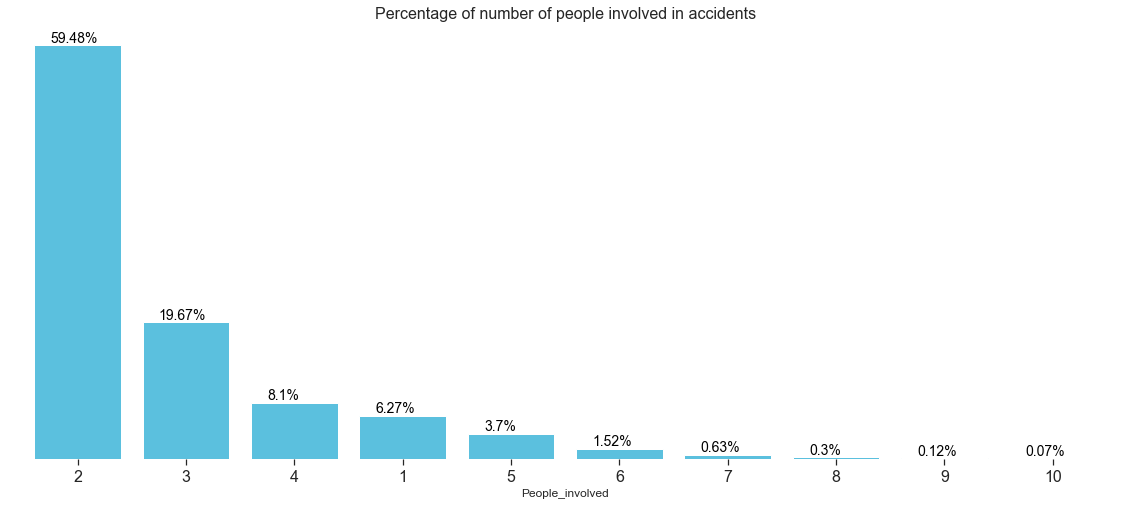

In [58]:
ax = jpc_final.plot(kind='bar', figsize=(20, 8), color=('#5bc0de'),  width = 0.8, fontsize=16)


sns.set_style('ticks')

ax.set_title("Percentage of number of people involved in accidents", fontsize=16)

ax.axes.get_yaxis().set_visible(False)
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_facecolor('xkcd:white')
plt.xticks(rotation=0)
    
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.15, i.get_height()+0.5, \
            str(round((i.get_height()), 2))+'%', fontsize=14, color='black')

<AxesSubplot:xlabel='SEVERITYCODE', ylabel='PERSONCOUNT'>

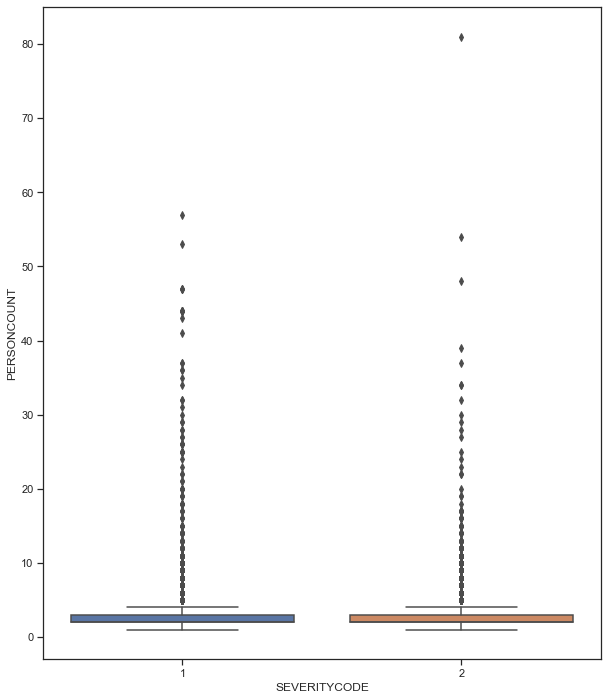

In [59]:
plt.figure(figsize=(10,12))


sns.boxplot(x = "SEVERITYCODE", y="PERSONCOUNT", data=df)

### 3.6. Relation between Number of people involved and accidents

In [60]:
df['VEHCOUNT'].describe()

count    176598.00000
mean          1.97389
std           0.55923
min           1.00000
25%           2.00000
50%           2.00000
75%           2.00000
max          12.00000
Name: VEHCOUNT, dtype: float64

In [61]:
vehcount_counts = df["VEHCOUNT"].value_counts().to_frame()
vehcount_counts.rename(columns={'VEHCOUNT': 'accidents'}, inplace=True)
vehcount_counts.index.name = 'vehicles_involved'
vehcount_counts

,accidents
vehicles_involved,
2,136892
1,24210
3,12459
4,2320
5,504
6,139
7,43
8,15
9,8


In [62]:
y_vc=vehcount_counts["accidents"]
x_vc=y_rd.sum(axis=0)
vehcount_counts['%_accidents'] = (y_vc / x_vc) * 100
vehcount_counts['%_accidents'].to_frame()
jvc=vehcount_counts['%_accidents'].round(decimals=2)
jvc_final=jvc.iloc[0:8]
jvc_final.to_frame()

,%_accidents
vehicles_involved,
2,77.52
1,13.71
3,7.06
4,1.31
5,0.29
6,0.08
7,0.02
8,0.01


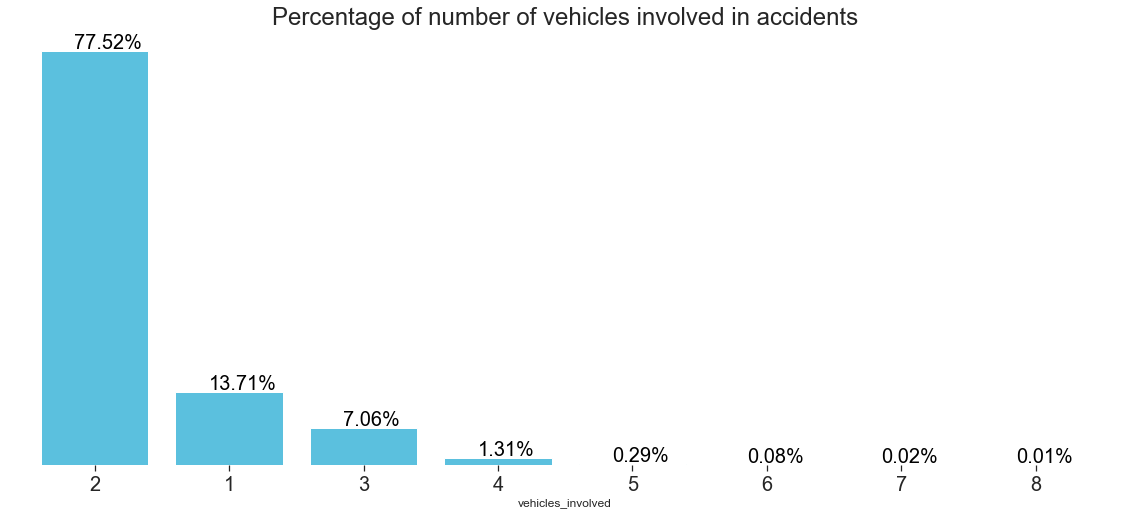

In [63]:
ax = jvc_final.plot(kind='bar', figsize=(20, 8), color=('#5bc0de'),  width = 0.8, fontsize=20)


sns.set_style('ticks')

ax.set_title("Percentage of number of vehicles involved in accidents", fontsize=24)

ax.axes.get_yaxis().set_visible(False)
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_facecolor('xkcd:white')
plt.xticks(rotation=0)
    
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.25, i.get_height()+0.5, \
            str(round((i.get_height()), 2))+'%', fontsize=20, color='black')

In [64]:
vehiclecount_sev = df.groupby(['VEHCOUNT', 'SEVERITYCODE']).size().to_frame()
pc_sevtop10=vehiclecount_sev.iloc[0:16]
pc_sevtop10

0
VEHCOUNT SEVERITYCODE        
1        1              10796
         2              13414
2        1             102405
         2              34487
3        1               7189
         2               5270
4        1               1284
         2               1036
5        1                252
         2                252
6        1                 81
         2                 58
7        1                 22
         2                 21
8        1                 10
         2                  5

<AxesSubplot:xlabel='SEVERITYCODE', ylabel='VEHCOUNT'>

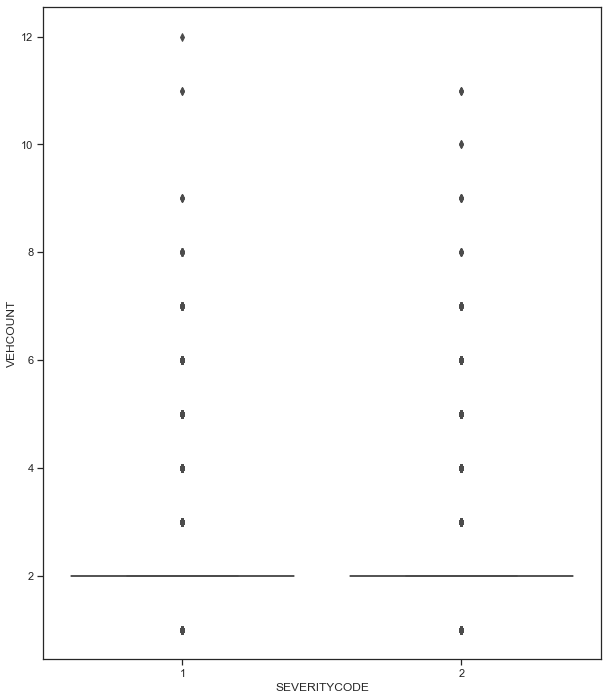

In [65]:
plt.figure(figsize=(10,12))


sns.boxplot(x = "SEVERITYCODE", y="VEHCOUNT", data=df)

## 4. Predictive Modeling  <a name="modeling"></a>

Let's split the data in train and test, with a test size of 20% and a random state of 4.

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (141278, 31) (141278,)
Test set: (35320, 31) (35320,)


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### 4.1 Decision Tree

In [34]:
import sklearn.metrics as metrics

In [57]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)


# modeling

from sklearn.tree import DecisionTreeClassifier


severityTree = DecisionTreeClassifier(criterion = 'entropy')
severityTree.fit(X_train,y_train)

# prediction
predTree = severityTree.predict(X_test)

print ("Test : ", predTree [0:5])
print ("train: ", y_test [0:5])


Test :  [1 2 2 1 1]
train:  [1 2 1 1 1]


In [62]:
# Visualisation
from sklearn import tree
%matplotlib inline

[Text(558.0, 978.48, 'X[1] <= -0.847\nentropy = 0.893\nsamples = 141278\nvalue = [97542, 43736]'),
 Text(279.0, 761.0400000000001, 'X[0] <= -0.797\nentropy = 0.992\nsamples = 19431\nvalue = [8675, 10756]'),
 Text(139.5, 543.6, 'X[29] <= -0.382\nentropy = 0.815\nsamples = 8744\nvalue = [6539, 2205]'),
 Text(69.75, 326.1600000000001, 'X[30] <= 2.673\nentropy = 0.786\nsamples = 4728\nvalue = [3620, 1108]'),
 Text(34.875, 108.72000000000003, '\n  (...)  \n'),
 Text(104.625, 108.72000000000003, '\n  (...)  \n'),
 Text(209.25, 326.1600000000001, 'X[3] <= 0.35\nentropy = 0.846\nsamples = 4016\nvalue = [2919, 1097]'),
 Text(174.375, 108.72000000000003, '\n  (...)  \n'),
 Text(244.125, 108.72000000000003, '\n  (...)  \n'),
 Text(418.5, 543.6, 'X[3] <= 0.35\nentropy = 0.722\nsamples = 10687\nvalue = [2136, 8551]'),
 Text(348.75, 326.1600000000001, 'X[29] <= -0.382\nentropy = 0.869\nsamples = 4554\nvalue = [1321, 3233]'),
 Text(313.875, 108.72000000000003, '\n  (...)  \n'),
 Text(383.625, 108.720

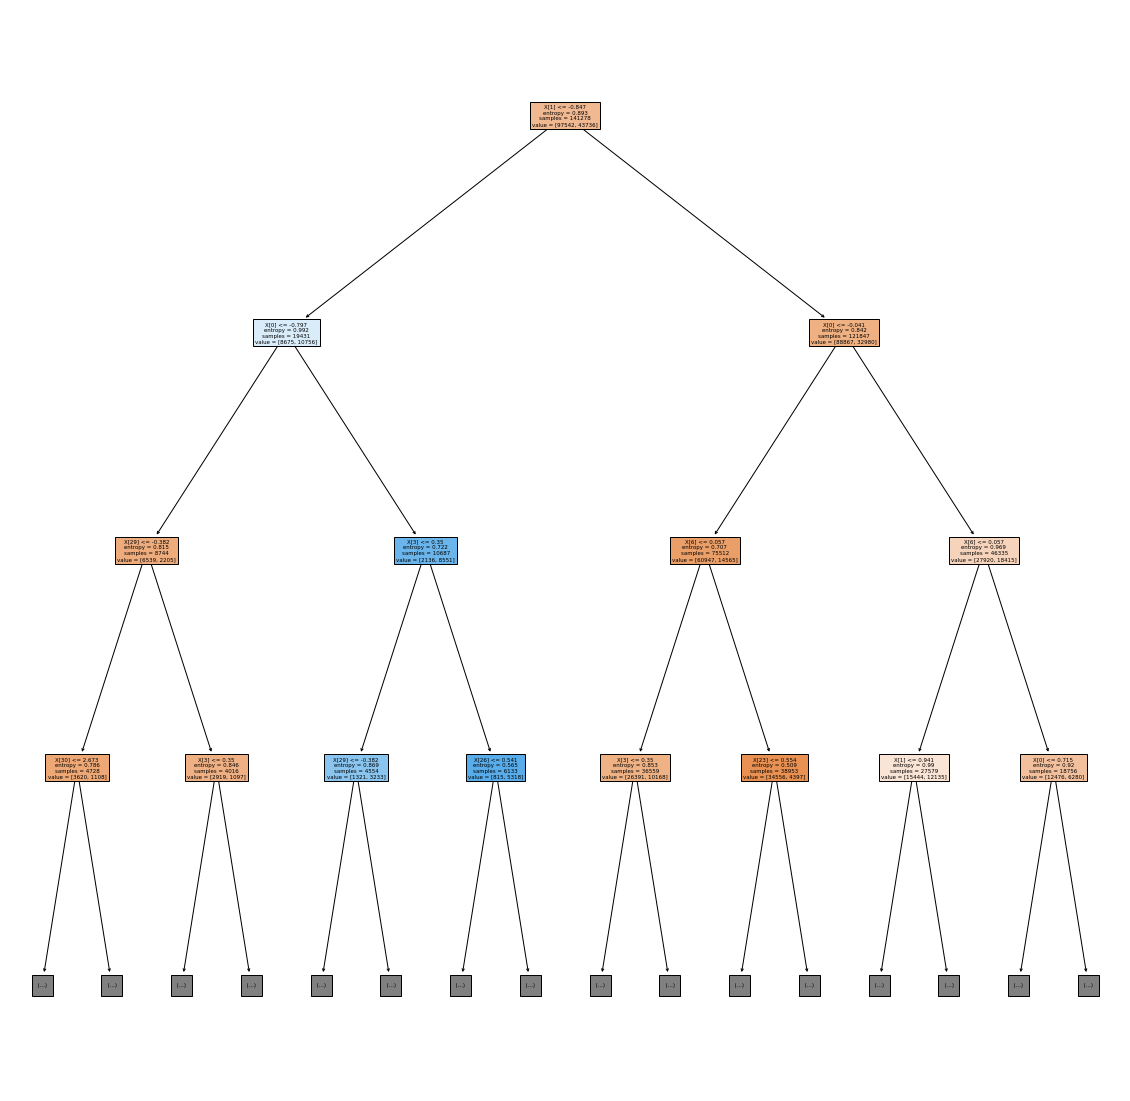

In [66]:
plt.figure(figsize=(20, 20))
tree.plot_tree(severityTree, max_depth=3, filled = True)

              precision    recall  f1-score   support

           1       0.74      0.95      0.84     24503
           2       0.70      0.26      0.38     10817

    accuracy                           0.74     35320
   macro avg       0.72      0.61      0.61     35320
weighted avg       0.73      0.74      0.70     35320

Confusion matrix, without normalization
[[23321  1182]
 [ 8017  2800]]


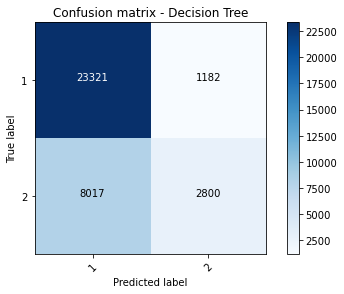

In [85]:
#confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predTree, labels=[1, 2])
np.set_printoptions(precision=2)

print (classification_report(y_test, predTree))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2],normalize= False,  title='Confusion matrix - Decision Tree')

### 4.2 Support Vector Machine

In [26]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (141278, 31) (141278,)
Test set: (35320, 31) (35320,)


In [27]:
# Modeling 
from sklearn import svm
clf = svm.SVC(kernel='rbf',gamma='auto')
clf.fit(X_train, y_train)

SVC(gamma='auto')

In [28]:
#predict
yhat_svm = clf.predict(X_test)

              precision    recall  f1-score   support

           1       0.74      0.97      0.84     24503
           2       0.78      0.21      0.33     10817

    accuracy                           0.74     35320
   macro avg       0.76      0.59      0.58     35320
weighted avg       0.75      0.74      0.68     35320

Confusion matrix, without normalization
[[23847   656]
 [ 8544  2273]]


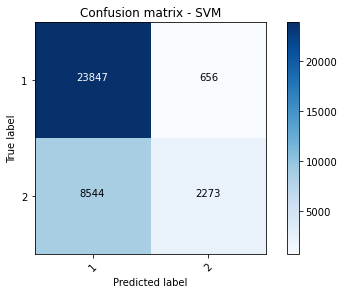

In [67]:
#confusion matrix

from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_svm, labels=[1, 2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_svm))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2],normalize= False,  title='Confusion matrix - SVM')

### 4.3 Logistic Regression

In [31]:
# Modeling 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

# Predict
yhat_lr = LR.predict(X_test)
yhat_prob_lr = LR.predict_proba(X_test)
yhat_prob_lr[0:5]

array([[0.67, 0.33],
       [0.79, 0.21],
       [0.71, 0.29],
       [0.84, 0.16],
       [0.74, 0.26]])

              precision    recall  f1-score   support

           1       0.73      0.94      0.82     24503
           2       0.62      0.20      0.31     10817

    accuracy                           0.72     35320
   macro avg       0.67      0.57      0.56     35320
weighted avg       0.69      0.72      0.66     35320

Confusion matrix, without normalization
[[23135  1368]
 [ 8624  2193]]


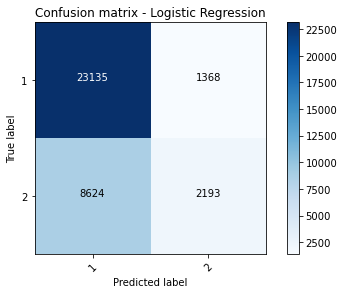

In [82]:
#confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_lr, labels=[1, 2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_lr))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2],normalize= False,  title='Confusion matrix - Logistic Regression')

### 4.5 Accuracy

In [83]:
#Decision Tree
j_dt = "%.4f" % jaccard_score(y_test, predTree)
f_dt = "%.4f" % f1_score (y_test, predTree, average='weighted')
a_dt = "%.4f" %metrics.accuracy_score(y_test, predTree)

print ('Jaccard similarity score with Decision Tree =', j_dt)
print ('Average F1 score with Decision Tree =', f_dt)
print ('Decision Tree accuracy =', a_dt)
print ()

#SVM
j_svm = "%.4f" % jaccard_score(y_test, yhat_svm)
f_svm = "%.4f" %f1_score (y_test, yhat_svm, average='weighted')
a_svm = "%.4f" %metrics.accuracy_score(y_test, yhat_svm)

print ('Jaccard similarity score with SVM =', j_svm)
print ('Average F1 score with SVM =', f_svm)
print ('SVM accuracy =', a_svm)
print()
#Logistic Regression
j_lr = "%.4f" % jaccard_score(y_test, yhat_lr)
f_lr = "%.4f" %f1_score (y_test, yhat_lr, average='weighted')
a_lr = "%.4f" %metrics.accuracy_score(y_test, yhat_lr)

from sklearn.metrics import log_loss
log_loss(y_test,yhat_prob_lr)
l_lr = "%.4f" % log_loss(y_test,yhat_prob_lr)

print ('Jaccard similarity score with SVM =', j_lr)
print ('Average F1 score with SVM =', f_lr)
print ('Logistic Regression accuracy =', a_lr)
print ('LogLoss with Logistic Regression =', l_lr)

Jaccard similarity score with Decision Tree = 0.7171
Average F1 score with Decision Tree = 0.6953
Decision Tree accuracy = 0.7396

Jaccard similarity score with SVM = 0.7216
Average F1 score with SVM = 0.6828
SVM accuracy = 0.7395

Jaccard similarity score with SVM = 0.6984
Average F1 score with SVM = 0.6640
Logistic Regression accuracy = 0.7171
LogLoss with Logistic Regression = 0.5775


### Table on performance of classification models - Accuracy

In [80]:
data = [['Decision Tree', j_dt, f_dt, a_dt, 'NA'], ['SVM', j_svm, f_svm, a_svm, 'NA'], ['Logistic Regression', j_lr, f_lr, a_lr, l_lr]] 

# Create the Performance of classification models - Accuracy 
df = pd.DataFrame(data, columns = ['Algorithm', 'Jaccard' , 'F1-score' , 'Accuracy' , 'LogLoss'])
df.set_index(['Algorithm', 'Jaccard' , 'F1-score' , 'Accuracy', 'LogLoss'],inplace=True)
df

,,,,
Algorithm,Jaccard,F1-score,Accuracy,LogLoss
Decision Tree,0.7171,0.6953,0.7396,NA
SVM,0.7216,0.6828,0.7395,NA
Logistic Regression,0.6984,0.6640,0.7171,0.5775


Since the target (i.e. dependent variable) is a categorical data, the logical model is classification so as to predict the severity of an accident.

The application of classification models follows a specific path. I divided the samples into two classes (80% training data, 20% test data, giving a random state of 4).

I then used three approaches to create three different predictive models: 
1.	Decision Tree
2.	Support Vector Machine (SVM)
3.	Logistic Regression. 

Among the three models, logistic regression was the one that had the worst accuracy with all the measures that I used, as it is visible in Table Performance of classification models - Accuracy (chapter 4. Modelling).

Even though the decision tree has a lower Jaccard score than the one of SVM, its F1-score and accuracy (using metrics.accuracy_score) are slightly higher. This situation is well shown by their confusion matrixes (see the three confusion matrix in the chapter 4. Modelling and the table below).

The three confusion matrixes show how the logistic regression model has a higher mistake with both severity 1 (i.e. property damages) and severity 2 (i.e. injuries). However, the decision tree has the highest true negatives while the SVM has the highest true positives (see table below).

|Algorithm|	True Positives|	False Positives|	False Negatives|	True Negatives|
|:-:|:-:|:-:|:-:|:-:|
|Decision Tree|	23,331|	1,182|	8,017|	2,800|
|SVM|	23,847|	656	|8,544|	2,273|
|Logistic Regression	|23,135|	1,368|	8,624|	2,193|


In this situation, both the decision tree and the SVM are good models to use. 

However, if we consider the objective of our project, we are more interested in saving life and avoiding injuries than avoiding property damages. Thus, predicting injuries (i.e. 2, true negative) is more important than property damages (i.e. 1, true positive).

Therefore, the Decision Tree is the best model to use for two reasons:
1.	It has better F1-score and accuracy
2.	It has the highest true negatives, thus it predicts accidents with injuries with greater accuracy

## 5. Results <a name="results"></a>

In this research I discovered that accidents occur much more often in situations that are – at least in theory – safer, i.e. conditions with clear sky, dry road, and daylight.

The larger number of the accidents takes place with clear sky (66.09%), rain (18%) and overcast (15.01%) and together they are the 99.10% of all the incidents. 

The vast majority of the incidents takes place when the roads are dry, in the 72.90% of the cases. Wet conditions of the road are the situation with the second higher percentage of incident (25.79%). These two variables together collect the 98.69% of the accidents while the other apparently more complicated conditions are correlated to only 1.31%.

The major part of the accidents takes place in daylight (in 67.84% of the cases). Dark (with lights street on) is the situation with the second highest percentage of incident (26.22%). Together they cover the 94.06% of the accidents.

Considering the conditions of weather, road and light, the amount of incidents with property damages is always larger than those ones with injuries.

Speeding is not a considerable attribute since it is responsible for only a small percentage of accidents. Thus, it was not possible to use it in the research study.

Whether we compare the different types of junctions, we discover that most of the accidents (47.16%) take place in mid-block crossing (not related to intersections). Accidents at intersections (related to the intersection) are the second most often incidents (33.47%) and happen more than the double of the time that the incidents in mid-block crossing related to intersections (12.40%). These three types of junction together are the places where more of the accidents happen (more than 90%).

If we take in consideration the type of severity that an incident can have, accidents with property damages are always more often than those ones with injuries – like in weather, light and road conditions. 

We can also see that the larger number of the accidents that occur in mid-block crossings (not related to intersections) have the highest number of incidents with property damages (i.e. 65,293): a number higher than the sum of incidents with property damages in the other junctions. However, the accidents with injuries at intersections (related to the intersections) are higher (i.e. 25.769) than those ones in mid-block crossing (not related to intersections), i.e. 17,993 incidents. This makes the intersections the most dangerous junctions.

The major part of the accidents involves 2 people (59.48%). Incidents involving 3 people have the second-highest percentage (19.67%). Together they cover 79.15% of the accidents and the percentage increase to 98,74% if we consider all the incidents that involve between 1 and 6 people. Over 10 people the percentage becomes so small that is rounded to zero. Its mean per accident is 2.55 people, its mode is 2 and the 75% of the incidents include between 1 and 3 people. This means that even though the highest number of people involved in an accident is 81, the vast majority of the incidents involves few people. This is true for both of the severities (i.e. property damages and injuries).

The 91.23% of the accidents involve 1 or 2 vehicles and 98.29% involves between 1 and 3 vehicles. The percentage of incidents with over 8 vehicles is so small that is rounded to zero. The mean per accident is 1.97 vehicles, its mode is 2 and 75% of the accidents include 1 or 2 vehicles. This means that even though the highest number of vehicles involved in an accident is 12, the larger number of incidents involves very few vehicles. This consideration is also valid for both of the severities (i.e. property damages and injuries).

Regarding the model to use for the predictions, both the Decision Tree (best F1-score and accuracy) and the Support Vector Machine (best Jaccard score) had good results. 

However, considering the objective of the study, we are more interested in saving life and avoiding injuries than avoiding property damages. Thus, predicting injuries (i.e. 2) is more important than property damages (i.e. 1).

Therefore, the Decision Tree is the best model to use for two reasons:
1.	It has better F1-score and accuracy
2.	It has higher true negatives, thus it predicts accidents with injuries with greater accuracy.

## 6. Discussion <a name="discussion"></a>

In this study I showed that accidents occur much more often in situations that are – at least in theory – safer, such as clear sky, dry road, and daylight. 

It looks like drivers are more careful when situations are more stressful and they undervalue the risk of accidents when there are good conditions of the weather, the light and the road. 

This is also consistent with the small number of people and vehicles usually involved in accidents.

## 7. Conclusions <a name="conclusions"></a>

Most of the people drive a vehicle for moving inside and outside cities everyday. It can be for commuting, going on holidays, visiting someone or something else. 

Having a reminder showing that most of the accidents happen in the easiest conditions (such as clear sky or daylight) could be useful. It would keep the driver in the same state of alert that they have when the conditions are worst (such as snow).

The models developed could also be useful for a municipality that wants to decrease the number of accidents in their district.

## References <a name="notes"></a>

1. "Road traffic injuries", World Health Organisation (WHO), 07/02/2020, https://www.who.int/news-room/fact-sheets/detail/road-traffic-injuries
2. Ibid.
3. "ArcGIS Metadata Form", https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf